In [2]:
import pandas as pd
import math
import numpy as np

In [3]:
data=pd.read_csv("load.csv")

In [4]:
data.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,2022-12-09T15:12:32+05:00,1.000000,NaN,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,NaN,200.0,NaN,NaN,http://192.168.107.193:9080/ribmob/public/v1/s...,NaN,NaN
1,http_req_duration,2022-12-09T15:12:32+05:00,228.891157,NaN,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,NaN,200.0,NaN,NaN,http://192.168.107.193:9080/ribmob/public/v1/s...,NaN,NaN
2,http_req_blocked,2022-12-09T15:12:32+05:00,99.247860,NaN,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,NaN,200.0,NaN,NaN,http://192.168.107.193:9080/ribmob/public/v1/s...,NaN,NaN
3,http_req_connecting,2022-12-09T15:12:32+05:00,99.142195,NaN,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,NaN,200.0,NaN,NaN,http://192.168.107.193:9080/ribmob/public/v1/s...,NaN,NaN
4,http_req_tls_handshaking,2022-12-09T15:12:32+05:00,0.000000,NaN,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,NaN,200.0,NaN,NaN,http://192.168.107.193:9080/ribmob/public/v1/s...,NaN,NaN


In [5]:
x=data

In [6]:
x=x.T
x.info()
# x.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, metric_name to metadata
Columns: 24372 entries, 0 to 24371
dtypes: object(24372)
memory usage: 3.5+ MB


In [7]:
# data.isna().sum()
data.shape[0]
for col in data.columns:
    if data[col].isna().sum()==data.shape[0]:
        print(f"column {col} is deleted because is was completely null")
        data = data.drop(col, axis=1)
data.head()

column check is deleted because is was completely null
column service is deleted because is was completely null
column subproto is deleted because is was completely null
column tls_version is deleted because is was completely null
column extra_tags is deleted because is was completely null
column metadata is deleted because is was completely null


,metric_name,timestamp,metric_value,error,error_code,expected_response,group,method,name,proto,scenario,status,url
0,http_reqs,2022-12-09T15:12:32+05:00,1.000000,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,200.0,http://192.168.107.193:9080/ribmob/public/v1/s...
1,http_req_duration,2022-12-09T15:12:32+05:00,228.891157,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,200.0,http://192.168.107.193:9080/ribmob/public/v1/s...
2,http_req_blocked,2022-12-09T15:12:32+05:00,99.247860,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,200.0,http://192.168.107.193:9080/ribmob/public/v1/s...
3,http_req_connecting,2022-12-09T15:12:32+05:00,99.142195,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,200.0,http://192.168.107.193:9080/ribmob/public/v1/s...
4,http_req_tls_handshaking,2022-12-09T15:12:32+05:00,0.000000,NaN,NaN,True,::setup,GET,http://192.168.107.193:9080/ribmob/public/v1/s...,HTTP/1.1,NaN,200.0,http://192.168.107.193:9080/ribmob/public/v1/s...


In [8]:
len(data.columns)

13

In [9]:
""" Unique values in each column"""
for unq in data[data.nunique().index]:
    if data[unq].unique().size<15:
        print(f"Unique values in {unq} are")
        print(data[unq].unique())
        print()

Unique values in error are
[nan 'request timeout']

Unique values in error_code are
[  nan 1500. 1050.]

Unique values in expected_response are
[True nan False]

Unique values in group are
['::setup' nan]

Unique values in method are
['GET' nan 'POST']

Unique values in proto are
['HTTP/1.1' nan]

Unique values in scenario are
[nan 'default']

Unique values in status are
[200.  nan 204. 500.   0.]



In [10]:
# len(data.nunique().index[0].unique())
data[data.nunique().index[0]].unique().size


15

In [11]:
"""Total  Number of Requests send"""
total_requests=data[data["metric_name"]=="http_reqs"].count()[0]
print(f"total number of requests in data set are {total_requests}")

total number of requests in data set are 2511


In [12]:
"""Avarage request Duration which is average of Total time for the request. 
It's equal to http_req_sending + http_req_waiting + http_req_receiving 
(i.e. how long did the remote server take to process the request and respond,
without the initial DNS lookup/connection times)."""

for metric in data["metric_name"].unique():
    sum_duration=data[data["metric_name"]==metric]["metric_value"].sum()
    count_duration=data[data["metric_name"]==metric]["metric_value"].count()
    average_req_duration=sum_duration/count_duration
    print(f"Avarage {metric} is {average_req_duration}")

Avarage http_reqs is 1.0
Avarage http_req_duration is 11638.643485821585
Avarage http_req_blocked is 110.02617990800476
Avarage http_req_connecting is 110.0052329948228
Avarage http_req_tls_handshaking is 0.0
Avarage http_req_sending is 0.035565091198725605
Avarage http_req_waiting is 11558.765161285943
Avarage http_req_receiving is 79.84275944444445
Avarage http_req_failed is 0.21983273596176822
Avarage vus is 47.40372670807454
Avarage vus_max is 80.0
Avarage data_sent is 20354.575757575756
Avarage data_received is 83975.02424242425
Avarage iteration_duration is 218513.21906058976
Avarage iterations is 1.0


In [13]:
# naval=0

# Count of each value in request
for unqcount in data.nunique().index:
    count=0
    if data[unqcount].unique().size<15:
        print(f"Working with {unqcount}")
        for sng in data[unqcount].unique():
            # print(type(sng))
            if data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]!=0:
                print(f"count of {sng} in {unqcount} is this  ", end="")
                print(data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0])
                count+=data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]
            # print("Inner loop done")
        if (1628-count)>=0:
            print(f"count of nan in {unqcount} is this {1628-count}")
        print()
    # print(unqcount)
    

Working with error
count of request timeout in error is this  26
count of nan in error is this 1602

Working with error_code
count of 1500.0 in error_code is this  526
count of 1050.0 in error_code is this  26
count of nan in error_code is this 1076

Working with expected_response
count of True in expected_response is this  1959
count of False in expected_response is this  552

Working with group
count of ::setup in group is this  3
count of nan in group is this 1625

Working with method
count of GET in method is this  2348
count of POST in method is this  163

Working with proto
count of HTTP/1.1 in proto is this  2485

Working with scenario
count of default in scenario is this  2508

Working with status
count of 200.0 in status is this  1337
count of 204.0 in status is this  622
count of 500.0 in status is this  526
count of 0.0 in status is this  26



In [14]:
for unqcount in data.nunique().index:
    count=0
    if data[unqcount].unique().size<15:
        print(f"Working with {unqcount}")
        for sng in data[unqcount].unique():
            # print(type(sng))
            if data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]!=0:
                print(f"percentage of {sng} in {unqcount} is this  ", end="")
                print((data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]/1628)*100)
                count+=(data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]/1628)*100
            # print("Inner loop done")
        if (100-count)>=0:
            print(f"count of nan in {unqcount} is this {100-count}")
        print()
    # print(unqcount)

Working with error
percentage of request timeout in error is this  1.597051597051597
count of nan in error is this 98.4029484029484

Working with error_code
percentage of 1500.0 in error_code is this  32.30958230958231
percentage of 1050.0 in error_code is this  1.597051597051597
count of nan in error_code is this 66.09336609336609

Working with expected_response
percentage of True in expected_response is this  120.33169533169531
percentage of False in expected_response is this  33.90663390663391

Working with group
percentage of ::setup in group is this  0.18427518427518427
count of nan in group is this 99.81572481572482

Working with method
percentage of GET in method is this  144.22604422604422
percentage of POST in method is this  10.012285012285012

Working with proto
percentage of HTTP/1.1 in proto is this  152.64127764127764

Working with scenario
percentage of default in scenario is this  154.05405405405406

Working with status
percentage of 200.0 in status is this  82.12530712

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
store_per={}
for unqcount in data.nunique().index:
    count=0
    list1_per=[]
    list1_val=[]
 
    if data[unqcount].unique().size<15:
        # print(f"Working with {unqcount}")
        for sng in data[unqcount].unique():
            # print(type(sng))
            if data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]!=0:
                # print(f"percentage of {sng} in {unqcount} is this  ", end="")
                # print((data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]/1628)*100)
                val=(data[(data[unqcount]==sng) & (data["metric_name"]=="http_reqs")].count()[0]/1628)*100
                count+=val
            # print("Inner loop done")
                list1_per.append(val)
                list1_val.append(sng)
        if (100-count)>=0:
            list1_per.append((100-count))
            list1_val.append("na")
        store_per[unqcount]=list1_per
        store_per[str(unqcount+"val")]=list1_val
        # print(f"count of nan in {unqcount} is this {100-count}")
        # print()


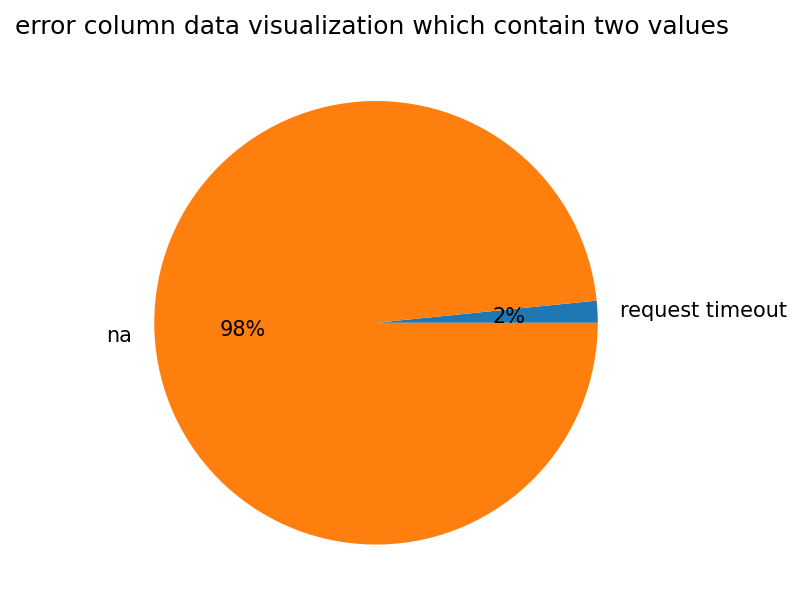

In [17]:
plt.figure(dpi=150)

plt.pie(store_per["error"], labels = store_per["errorval"],autopct='%.0f%%')
plt.title("error column data visualization which contain two values ")
plt.show() 

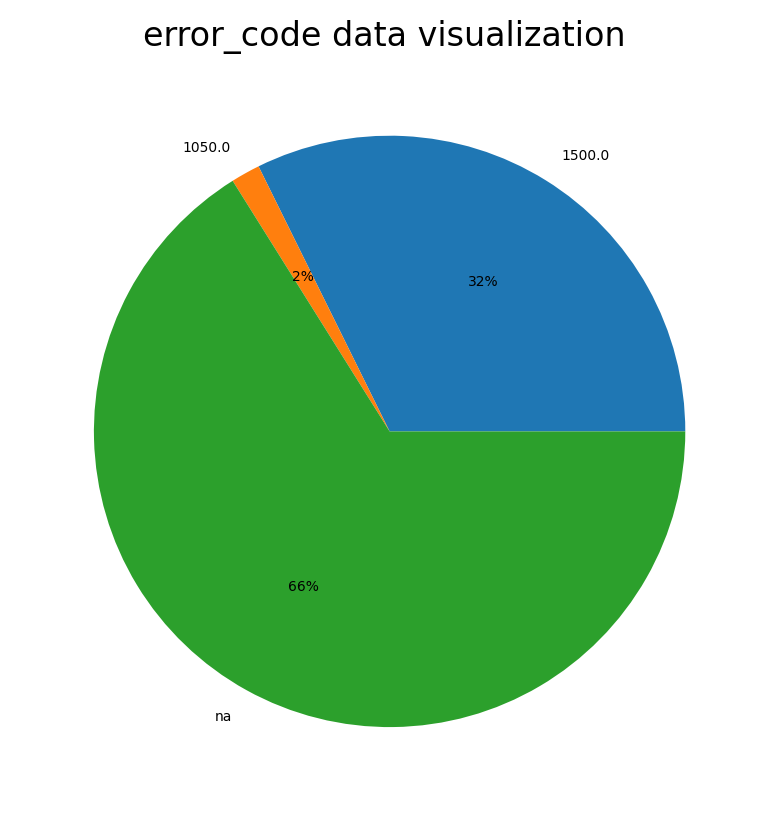

In [18]:
plt.figure(dpi=200)
plt.pie(store_per["error_code"], labels = store_per["error_codeval"],textprops={'fontsize': 5},autopct='%.0f%%')
plt.title("error_code data visualization ")
plt.show() 

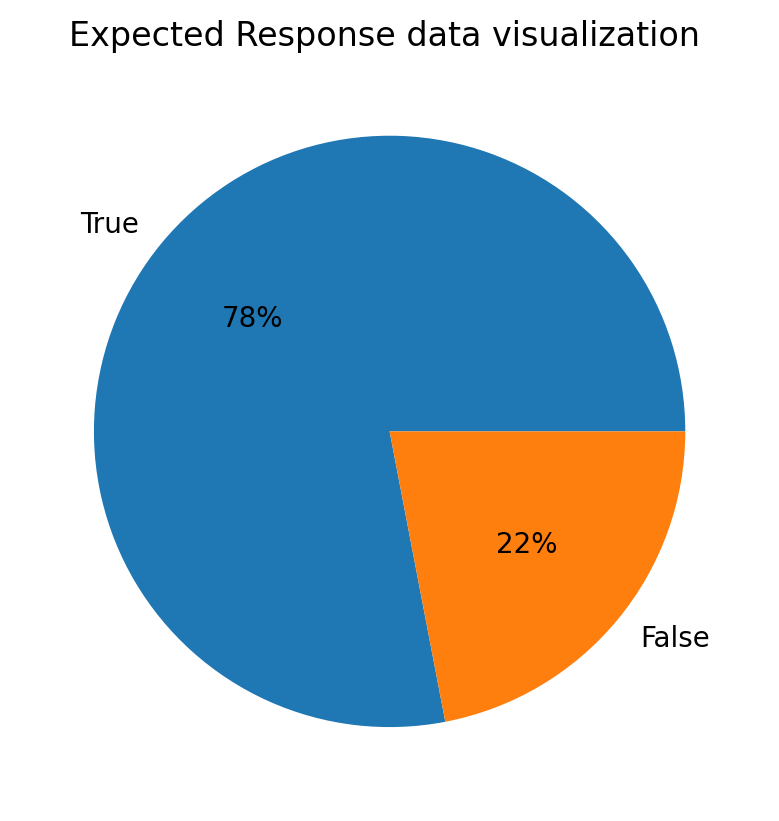

In [19]:
plt.figure(dpi=200)
plt.pie(x=store_per["expected_response"], labels = store_per["expected_responseval"],textprops={'fontsize': 10},autopct='%.0f%%')
plt.title("Expected Response data visualization ")
plt.show() 

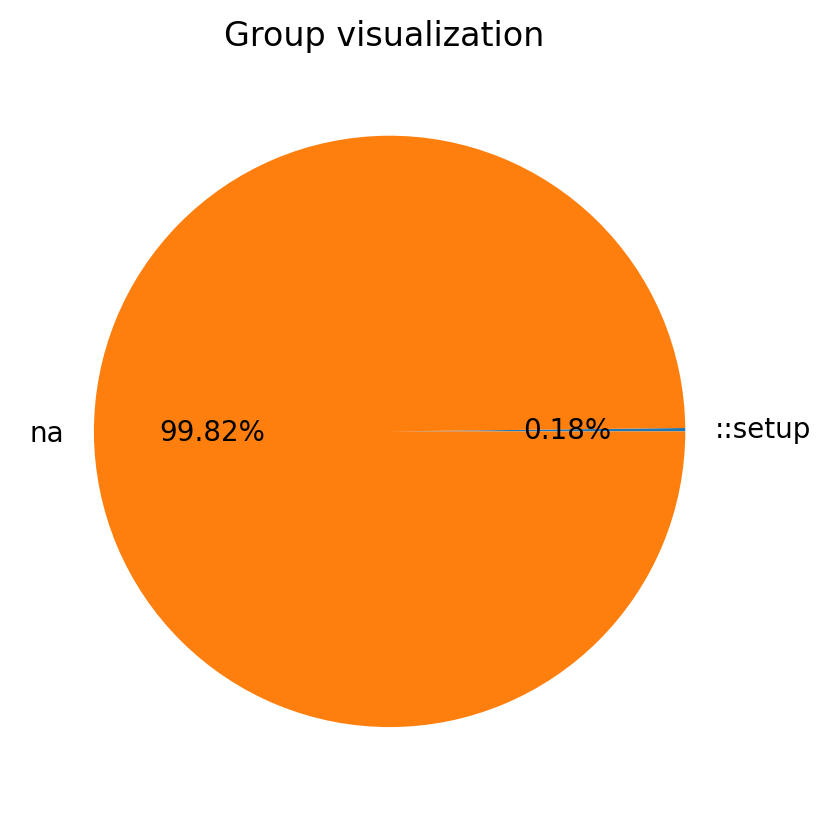

In [20]:
plt.figure(dpi=200)
plt.pie(x=store_per["group"], labels = store_per["groupval"],textprops={'fontsize': 10},autopct='%.2f%%')
plt.title("Group visualization ")
plt.show() 

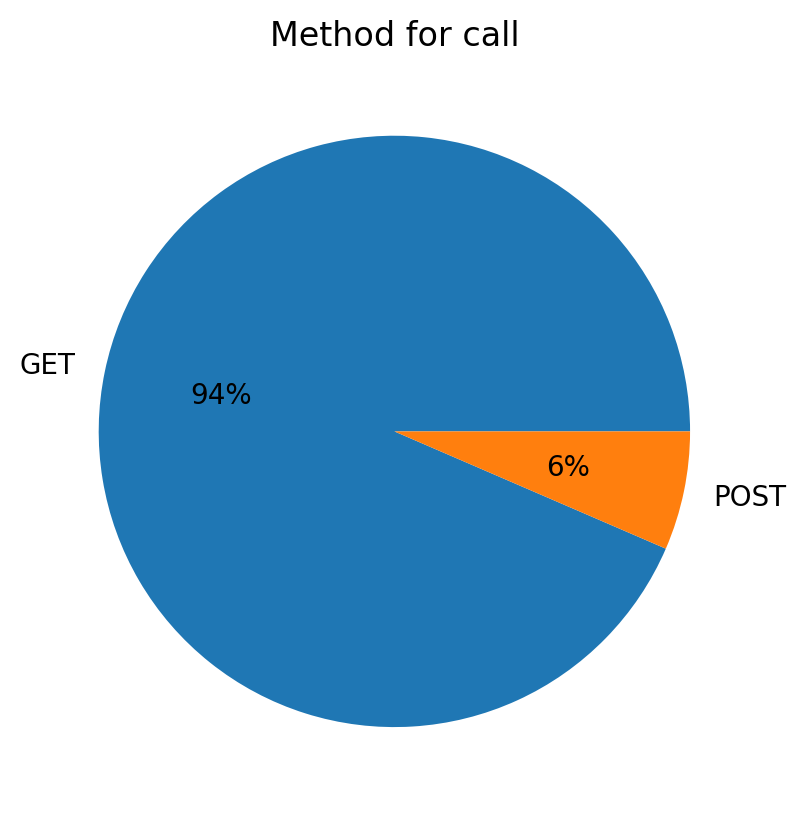

In [21]:
plt.figure(dpi=200)
plt.pie(x=store_per["method"], labels = store_per["methodval"],textprops={'fontsize': 10},autopct='%.0f%%')
plt.title("Method for call")
plt.show() 

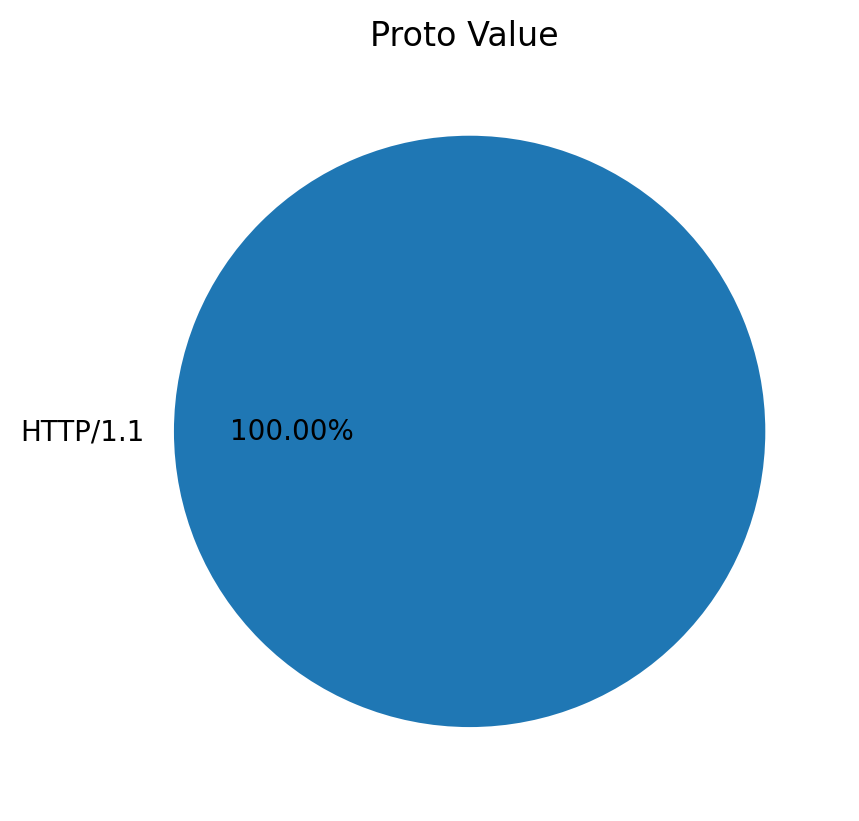

In [22]:
plt.figure(dpi=200)
plt.pie(store_per["proto"], labels = store_per["protoval"],textprops={'fontsize': 10},autopct='%.2f%%')
plt.title("Proto Value ")
plt.show() 

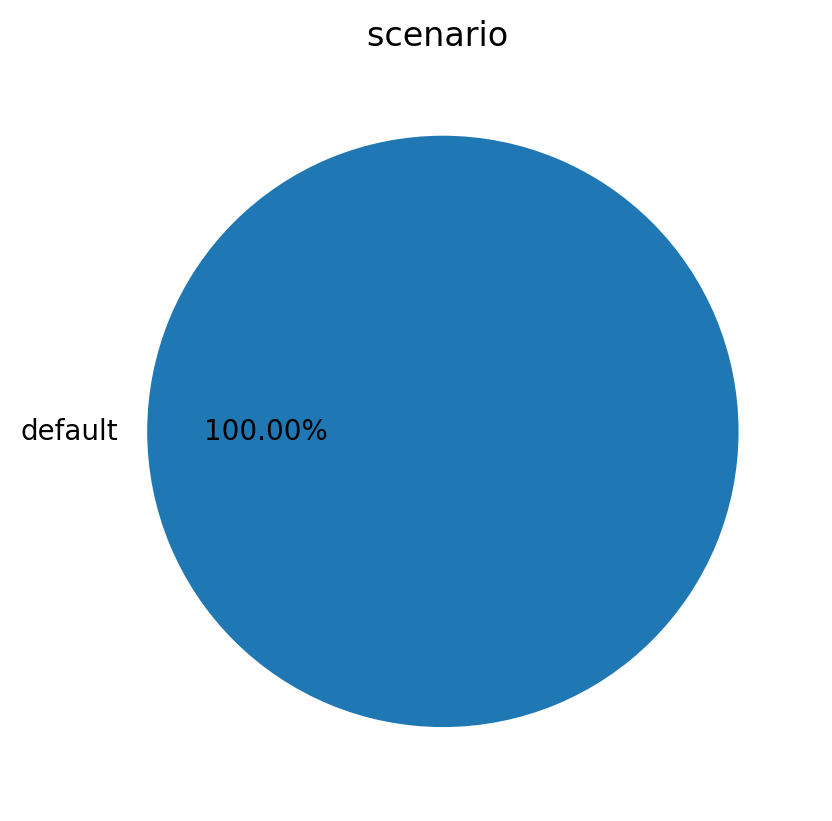

In [23]:
plt.figure(dpi=200)
plt.pie(store_per["scenario"], labels = store_per["scenarioval"],textprops={'fontsize': 10},autopct='%.2f%%')
plt.title("scenario ")
plt.show() 

In [24]:
store_per.keys()

dict_keys(['error', 'errorval', 'error_code', 'error_codeval', 'expected_response', 'expected_responseval', 'group', 'groupval', 'method', 'methodval', 'proto', 'protoval', 'scenario', 'scenarioval', 'status', 'statusval'])

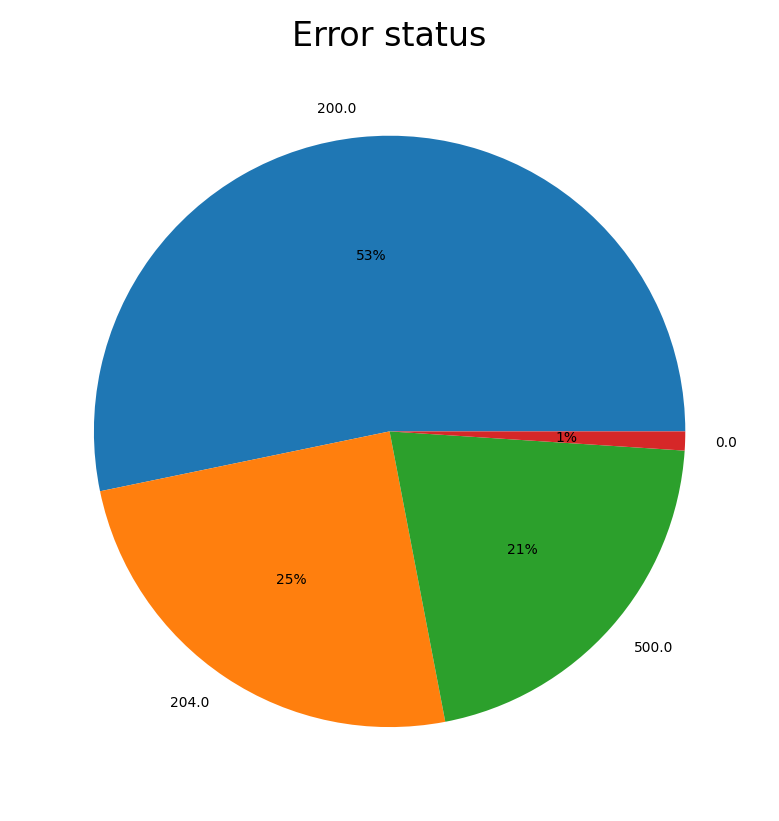

In [25]:
plt.figure(dpi=200)
plt.pie(store_per["status"], labels = store_per["statusval"],textprops={'fontsize': 5},autopct='%.0f%%')
plt.title("Error status")
plt.show() 

Text(0.5, 1.0, 'No of request to status')

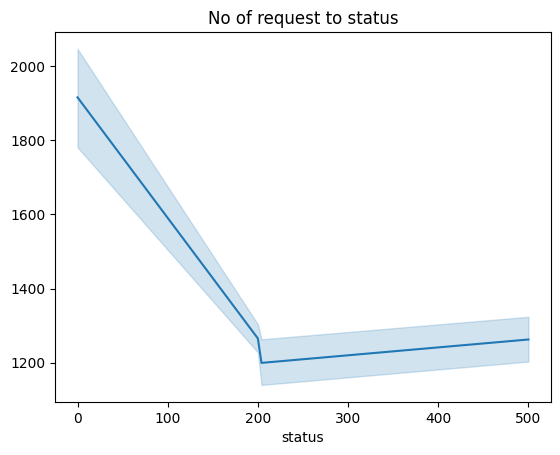

In [26]:
sns.lineplot(x=data[data["metric_name"]=="http_reqs"]["status"],y=np.arange(0,data[data["metric_name"]=="http_reqs"]["status"].shape[0]))
data.shape[0]
plt.title("No of request to status")
# data[data["metric_name"]=="http_reqs"]["status"]
# plt.grid()

In [27]:
lst=[i[11:] for i in data['timestamp']]

In [28]:

data['timestamp']=pd.to_datetime(data['timestamp'])

In [29]:
# data['timestamp'].groupby(pd.Grouper(freq = '10min')).mean()
data['timestamp'].dt.minute.unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

Text(0.5, 1.0, 'count plot of error')

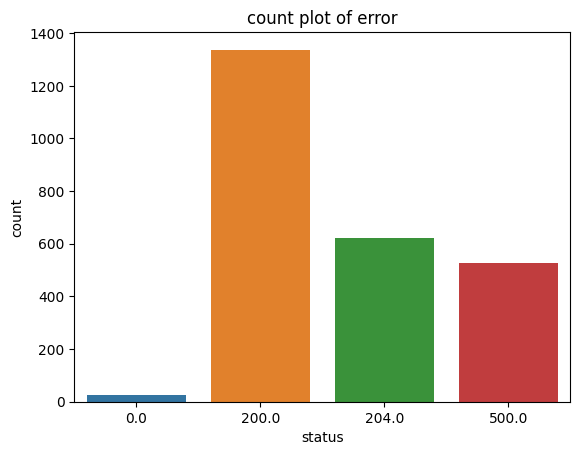

In [30]:
sns.countplot(x=data[data["metric_name"]=="http_reqs"]["status"])
plt.title("count plot of error")

In [72]:
x1=data.groupby("metric_name")

In [75]:
x1.describe()

metric_value                               \
                                count           mean           std   
metric_name                                                          
data_received                   165.0   83975.024242  13930.056969   
data_sent                       165.0   20354.575758   6600.802574   
http_req_blocked               2511.0     110.026180    656.269407   
http_req_connecting            2511.0     110.005233    656.261631   
http_req_duration              2511.0   11638.643486  12454.677795   
http_req_failed                2511.0       0.219833      0.414216   
http_req_receiving             2511.0      79.842759    621.097432   
http_req_sending               2511.0       0.035565      0.023771   
http_req_tls_handshaking       2511.0       0.000000      0.000000   
http_req_waiting               2511.0   11558.765161  12448.584508   
http_reqs                      2511.0       1.000000      0.000000   
iteration_duration               78.0  218513.219061  42092.224887   
iterations                       77.0       1.000000      0.000000   
vus                             644.0      47.403727     23.272843   
vus_max                         644.0      80.000000      0.000000   

                                                                      \
                                   min            25%            50%   
metric_name                                                            
data_received              4378.000000   77086.000000   91820.000000   
data_sent                  1795.000000   16641.000000   26031.000000   
http_req_blocked              0.001406       0.003064       0.003754   
http_req_connecting           0.000000       0.000000       0.000000   
http_req_duration           228.891157    4564.041135    6841.696491   
http_req_failed               0.000000       0.000000       0.000000   
http_req_receiving            0.000000       0.075631       1.198732   
http_req_sending              0.010807       0.020556       0.025226   
http_req_tls_handshaking      0.000000       0.000000       0.000000   
http_req_waiting            223.159642    4550.769609    6804.579546   
http_reqs                     1.000000       1.000000       1.000000   
iteration_duration        14063.136260  191000.227811  214177.651164   
iterations                    1.000000       1.000000       1.000000   
vus                           0.000000      33.000000      49.000000   
vus_max                      80.000000      80.000000      80.000000   

                                                       error_code  \
                                    75%            max      count   
metric_name                                                         
data_received              95800.000000   95811.000000        0.0   
data_sent                  26031.000000   26031.000000        0.0   
http_req_blocked               0.013171   10364.878451      552.0   
http_req_connecting            0.000000   10364.823776      552.0   
http_req_duration          11655.921292   60001.113092      552.0   
http_req_failed                0.000000       1.000000      552.0   
http_req_receiving             5.424946   12157.104103      552.0   
http_req_sending               0.044791       0.478250      552.0   
http_req_tls_handshaking       0.000000       0.000000      552.0   
http_req_waiting           11543.388359   60001.085230      552.0   
http_reqs                      1.000000       1.000000      552.0   
iteration_duration        242403.341085  295335.220287        0.0   
iterations                     1.000000       1.000000        0.0   
vus                           73.250000      80.000000        0.0   
vus_max                       80.000000      80.000000        0.0   

                                       ...                  status  \
                                 mean  ...     75%     max   count   
metric_name                            ...                           
data_received 

metric_name
data_received               AxesSubplot(0.125,0.11;0.775x0.77)
data_sent                   AxesSubplot(0.125,0.11;0.775x0.77)
http_req_blocked            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_connecting         AxesSubplot(0.125,0.11;0.775x0.77)
http_req_duration           AxesSubplot(0.125,0.11;0.775x0.77)
http_req_failed             AxesSubplot(0.125,0.11;0.775x0.77)
http_req_receiving          AxesSubplot(0.125,0.11;0.775x0.77)
http_req_sending            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_tls_handshaking    AxesSubplot(0.125,0.11;0.775x0.77)
http_req_waiting            AxesSubplot(0.125,0.11;0.775x0.77)
http_reqs                   AxesSubplot(0.125,0.11;0.775x0.77)
iteration_duration          AxesSubplot(0.125,0.11;0.775x0.77)
iterations                  AxesSubplot(0.125,0.11;0.775x0.77)
vus                         AxesSubplot(0.125,0.11;0.775x0.77)
vus_max                     AxesSubplot(0.125,0.11;0.775x0.77)
Name: status, dtype: object

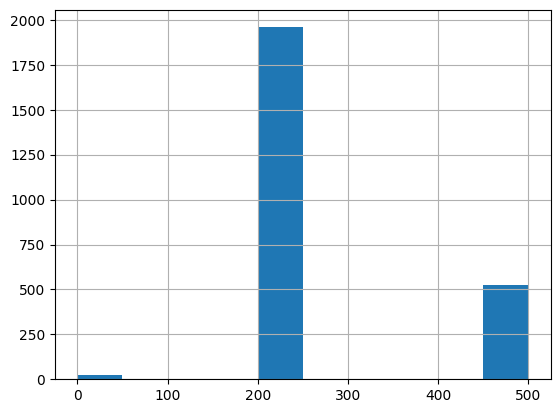

In [86]:
# sns.lineplot(data=x1.status[0])
# dir(x1.status)
x1.status.hist()

metric_name
data_received               AxesSubplot(0.125,0.11;0.775x0.77)
data_sent                   AxesSubplot(0.125,0.11;0.775x0.77)
http_req_blocked            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_connecting         AxesSubplot(0.125,0.11;0.775x0.77)
http_req_duration           AxesSubplot(0.125,0.11;0.775x0.77)
http_req_failed             AxesSubplot(0.125,0.11;0.775x0.77)
http_req_receiving          AxesSubplot(0.125,0.11;0.775x0.77)
http_req_sending            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_tls_handshaking    AxesSubplot(0.125,0.11;0.775x0.77)
http_req_waiting            AxesSubplot(0.125,0.11;0.775x0.77)
http_reqs                   AxesSubplot(0.125,0.11;0.775x0.77)
iteration_duration          AxesSubplot(0.125,0.11;0.775x0.77)
iterations                  AxesSubplot(0.125,0.11;0.775x0.77)
vus                         AxesSubplot(0.125,0.11;0.775x0.77)
vus_max                     AxesSubplot(0.125,0.11;0.775x0.77)
Name: error_code, dtype: object

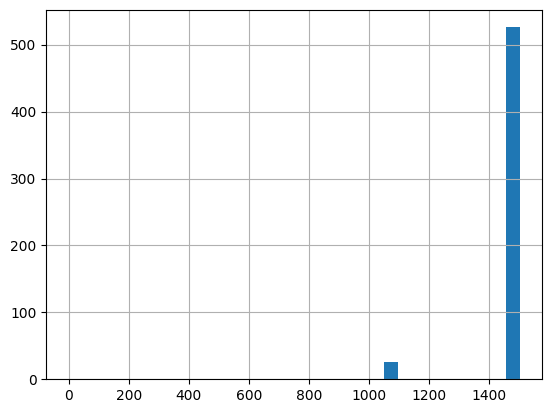

In [87]:
x1.error_code.hist()

metric_name
data_received               AxesSubplot(0.125,0.11;0.775x0.77)
data_sent                   AxesSubplot(0.125,0.11;0.775x0.77)
http_req_blocked            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_connecting         AxesSubplot(0.125,0.11;0.775x0.77)
http_req_duration           AxesSubplot(0.125,0.11;0.775x0.77)
http_req_failed             AxesSubplot(0.125,0.11;0.775x0.77)
http_req_receiving          AxesSubplot(0.125,0.11;0.775x0.77)
http_req_sending            AxesSubplot(0.125,0.11;0.775x0.77)
http_req_tls_handshaking    AxesSubplot(0.125,0.11;0.775x0.77)
http_req_waiting            AxesSubplot(0.125,0.11;0.775x0.77)
http_reqs                   AxesSubplot(0.125,0.11;0.775x0.77)
iteration_duration          AxesSubplot(0.125,0.11;0.775x0.77)
iterations                  AxesSubplot(0.125,0.11;0.775x0.77)
vus                         AxesSubplot(0.125,0.11;0.775x0.77)
vus_max                     AxesSubplot(0.125,0.11;0.775x0.77)
Name: metric_value, dtype: object

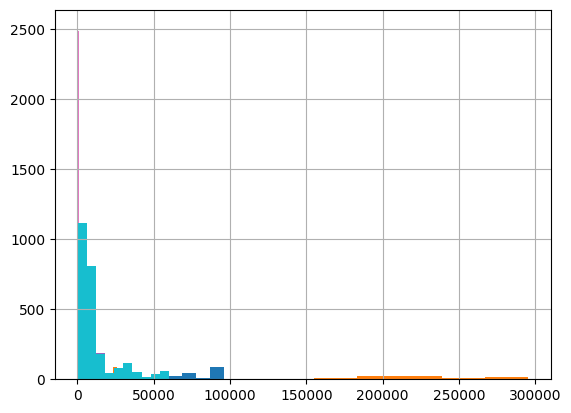

In [88]:
x1.metric_value.hist()

In [98]:
# x1.metric_value.cumsum()
# sns.swarmplot(x=data["status"],y=data["metric_value"])